# Alarming Decrease in Water Level in the Great Salt Lake

This is the draft outline and raw data assignment which includes the research question, introduction, description of study site, description of data sets, loading and initial plotting of raw data, additional planned analyses, and the discussion/conclusion.

@author = Kaylee Molan for ESCI 7/896.02  
@date = 2023-03-30   
@license = MIT -- https://opensource.org/licenses/MIT

 ## Research Question:
What is the theoretical date that the Great Salt Lake be completely dry if no drastic preventative measures are taken?

## Introduction 
The Great Salt Lake is a remnant of Lake Bonneville and is the largest salt water lake in the Western Hemisphere. It is important to note that this lake is unique in the fact that it does not have any outlets, so this water is either evaporated or utilized by the public. Also, there are only 3 major rivers that contribute heavy flows  into the Great Salt Lake. 

Knowing when the lake will be completely dried up is critically important as this lake serves many important purposes. It acts as a home to a variety of plants and animals, is a large economic resource for Utah, provides water for agriculture and other activities, and even acts as a recreational pursuit for the community. As the lake dries up, there are many negative consequences that will come about in relation to the ecosystem currently prevalent in this area, job losses and decreased economic growth, exacerbation of water shortages, etc. Continually, knowing when the lake will be completely dry is important as there are some concerns about the air surrounding Salt Lake City becoming poisonous since the bed of the Great Salt Lake holds high levels of dangerous particles like arsenic, antimony, copper, zirconium, and various heavy metals.

## Description of Study Site 
The Great Salt Lake watershed is a large, complex ecosystem located in northern Utah, in the western United States. The watershed covers an area of approximately 22,000 square miles, including the Great Salt Lake, which is the largest saltwater lake in the Western Hemisphere. The watershed is home to a diverse range of flora and fauna, including numerous migratory birds, fish species, and wetland plants. The area is also important for its unique geological features, including the surrounding mountains and the salt flats that surround the lake. The watershed is fed by numerous streams and rivers, with the Bear, Jordan, and Weber rivers providing the greatest flow into the lake. The lake itself has no outlet, so water leaves the system through evaporation, leaving behind a highly concentrated salt solution.

## Description of Data Sets

GSL-precip: 
This dataset is from NOAA Climate at a Glance for Salt Lake City, Utah and contains the annual precipitation (in inches) from the year 1948 to 2022.
Link: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00024127/pcp/ann/1/1895-2023?base_prd=true&begbaseyear=1895&endbaseyear=2020

GSL-waterlevel:
This dataset is from USGS Site 10010100 and contains the annual water surface elevation (in feet) of the Great Salt Lake in Salt Lake City, Utah from the year 1990 to 2022. 
Link: https://waterdata.usgs.gov/nwis/annual?site_no=10010100&agency_cd=USGS&por_10010100_178324=448793,62614,178324,1966,2023&year_type=W&referred_module=sw&format=rdb

BearRiver-Q:
This dataset is from USGS  10126000 and contains the annual discharge (in cubic feet per second) of the Bear River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1950 to 2022. 

JordanRiver-Q:
This dataset is from USGS 10171000 and contains the annual discharge (in cubic feet per second) of the Jordan River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1944 to 2022. 

WeberRiver-Q:
This dataset is from USGS 10136500 and contains the annual discharge (in cubic feet per second) of the Weber River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1921 to 2022. 
Links for the rivers: https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default 


### Load and initial plot of raw data 

In [1]:
import os
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

#%% Specify parameters 
# Primary and secondary precipitation data (with extension)
infile_names = 'GSL-precip.csv', 'GSL-waterlevel.csv', 'WeberRiver-Q.csv', 'JordanRiver-Q.csv', 'BearRiver-Q.csv'

# Text for figure title
fig_title = "Great Salt Lake, Utah"

In [2]:
#%% Load and examine data
os.chdir("/Users/kayleemolan/Desktop/Hydrodata Analysis/Project")

#Precipitation data
datap=pd.read_csv(infile_names[0],parse_dates=['Date'], 
                 index_col=['Date'], skiprows=4)
datap.index=pd.to_datetime(datap.index, format='%Y12')
datap.drop(columns = {"Anomaly"},inplace = True)
datap=datap.rename(columns={"Value":"Precipitation (in/year)"})

#Water level data
dataw=pd.read_csv(infile_names[1], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataw=dataw.rename(columns={"12n":"Water Level (feet)"})
dataw = dataw.rename_axis('Date')

#Discharge data
#Weber River
dataqw=pd.read_csv(infile_names[2], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqw=dataqw.rename(columns={"12n":"Weber Discharge (cfs)"})
dataqw = dataqw.rename_axis('Date')

#Jordan River
dataqj=pd.read_csv(infile_names[3], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqj.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqj=dataqj.rename(columns={"12n":"Jordan Discharge (cfs)"})
dataqj = dataqj.rename_axis('Date')

#Bear River
dataqb=pd.read_csv(infile_names[4], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqb.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqb=dataqb.rename(columns={"12n":"Bear Discharge (cfs)"})
dataqb = dataqb.rename_axis('Date')

In [3]:
#%% Merge all data frames into one singular data frame

#Merged based on index columns
merged_df = pd.merge(dataqw,dataqb,left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataqj, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataw, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, datap, left_index=True, right_index=True)
data= merged_df

Text(0.5, 1.0, 'Great Salt Lake, Utah')

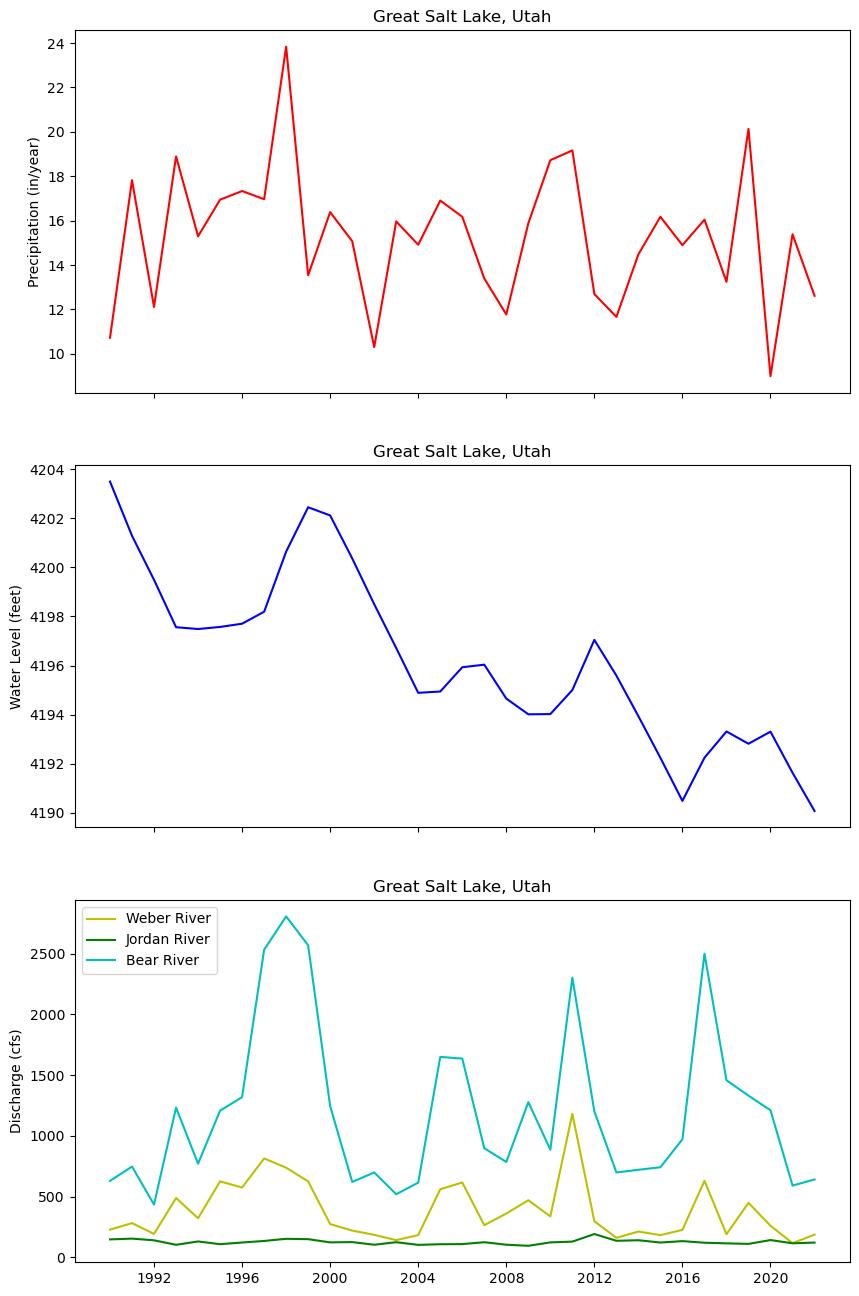

In [4]:
#%%Figure 1

#Plot raw data w/ 3 subpanels (precipitation, water level, discharge)
#Create plot to display data
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,16), sharex=True)

#Plot precipitation
ax1.plot(data['Precipitation (in/year)'],'r-', label='Annual Precipitation')
ax1.set_ylabel('Precipitation (in/year)')
ax1.set_title(fig_title)

#Plot integrated soil moisture content
ax2.plot(data['Water Level (feet)'], 'b-', label= 'Water Level')
ax2.set_ylabel('Water Level (feet)')
ax2.set_title(fig_title)

#Plot precipitation over entire period of study
ax3.plot(data['Weber Discharge (cfs)'], 'y-', label= 'Weber River')
ax3.plot(data['Jordan Discharge (cfs)'], 'g-', label= 'Jordan River')
ax3.plot(data['Bear Discharge (cfs)'], 'c-', label= 'Bear River')
ax3.legend()
ax3.set_ylabel('Discharge (cfs)')
ax3.set_title(fig_title)

### Additional planned analyses

#Merge dataframes into one singular dataframe, with the dataframe starting in 1990

#Plot raw data over time (Figure 1) with 3 subpanels: 1 for the discharge from the 3 rivers, 1 for precipitation, and 1 for water level

#Plot based on seasonal cycles (Figure 2)

#Plot waterlevel vs surface area (Figure 3)

#Calculate a water balance on the lake by subtracting outputs (evaporation) from inputs (precipitation and discharge from the 3 rivers)
   
#Calculate rate of decrease in water level based on water balance, change in storage (volume depth lost every year)
#Calculate cumulative water balance (sum of calculated water balance)

#Plot water level and the calculated water balance over time (Figure 4)

#Extrapolate data to estimate the theoretical date the lake will dry up

#Print date to screen


### Discussion/conclusion

Summarize results and consider implications of the main findings:

Important trends and patterns that the analysis reveals in the data:

Consider the results in the context of previous work at other sites and/or produced by other analytical techniques:

Describe any unexpected findings:

Consider ways to reduce errors or improve method:

Discuss whether the data support the hypothesis and the expectations described in the introduction:

Explain conclusions that can be made from these results and the significance of these conclusions to other scientists or watershed managers:
